## This notebook implements PyTorch based classification for the good old iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch import nn
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"

In [3]:
X, y = load_iris(return_X_y=True)
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

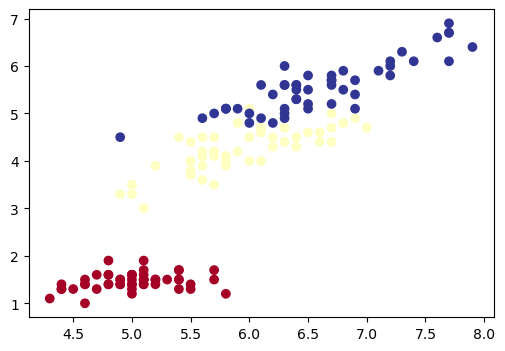

In [4]:
# Visualize the data across two dimension let's say SepalLength and PetalLength
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='RdYlBu');

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=100):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.linear_layer_stack(x)

In [7]:
model_0 = NeuralNetwork(input_features=4, output_features=3, hidden_units=100)
model_0.to(device)
next(model_0.parameters()).device

device(type='mps', index=0)

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [9]:
epochs = 3000
trainLossList = []
testLossList = []
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in tqdm(range(epochs)):
    ### Training
    model_0.train()

    # 1. Forward Pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Compute Loss
    loss = loss_fn(y_logits, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Backpropagate
    loss.backward()

    #5. Step the optimizer
    optimizer.step()

    acc = accuracy_score(y_true=y_train.cpu(), y_pred=y_preds.cpu())

     ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_score(y_true=y_test.cpu(), y_pred=test_preds.cpu())
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch}| Train Loss: {loss:.4f}| Train Acc: {acc}| Test Loss: {test_loss:.4f}| Test Acc: {test_acc}")

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())    

  1%|          | 25/3000 [00:00<00:25, 117.42it/s]

Epoch: 0| Train Loss: 0.9949| Train Acc: 0.6583333333333333| Test Loss: 0.9692| Test Acc: 0.7


  4%|▍         | 127/3000 [00:00<00:12, 232.29it/s]

Epoch: 100| Train Loss: 0.4744| Train Acc: 0.9166666666666666| Test Loss: 0.4644| Test Acc: 0.9


  8%|▊         | 248/3000 [00:01<00:11, 235.24it/s]

Epoch: 200| Train Loss: 0.3313| Train Acc: 0.9666666666666667| Test Loss: 0.3298| Test Acc: 0.9666666666666667


 12%|█▏        | 353/3000 [00:01<00:10, 255.29it/s]

Epoch: 300| Train Loss: 0.2420| Train Acc: 0.9666666666666667| Test Loss: 0.2474| Test Acc: 1.0


 14%|█▍        | 434/3000 [00:01<00:09, 258.91it/s]

Epoch: 400| Train Loss: 0.1852| Train Acc: 0.9666666666666667| Test Loss: 0.1960| Test Acc: 1.0


 18%|█▊        | 542/3000 [00:02<00:09, 262.30it/s]

Epoch: 500| Train Loss: 0.1502| Train Acc: 0.975| Test Loss: 0.1643| Test Acc: 1.0


 22%|██▏       | 653/3000 [00:02<00:08, 269.28it/s]

Epoch: 600| Train Loss: 0.1283| Train Acc: 0.975| Test Loss: 0.1443| Test Acc: 1.0


 25%|██▍       | 736/3000 [00:03<00:08, 271.67it/s]

Epoch: 700| Train Loss: 0.1138| Train Acc: 0.975| Test Loss: 0.1311| Test Acc: 1.0


 28%|██▊       | 845/3000 [00:03<00:08, 261.34it/s]

Epoch: 800| Train Loss: 0.1039| Train Acc: 0.975| Test Loss: 0.1220| Test Acc: 1.0


 31%|███       | 927/3000 [00:03<00:07, 259.54it/s]

Epoch: 900| Train Loss: 0.0967| Train Acc: 0.975| Test Loss: 0.1153| Test Acc: 1.0


 34%|███▍      | 1031/3000 [00:04<00:07, 247.19it/s]

Epoch: 1000| Train Loss: 0.0913| Train Acc: 0.975| Test Loss: 0.1104| Test Acc: 1.0


 38%|███▊      | 1135/3000 [00:04<00:07, 241.96it/s]

Epoch: 1100| Train Loss: 0.0871| Train Acc: 0.9833333333333333| Test Loss: 0.1066| Test Acc: 1.0


 42%|████▏     | 1245/3000 [00:05<00:06, 261.57it/s]

Epoch: 1200| Train Loss: 0.0838| Train Acc: 0.9833333333333333| Test Loss: 0.1036| Test Acc: 1.0


 44%|████▍     | 1324/3000 [00:05<00:06, 245.54it/s]

Epoch: 1300| Train Loss: 0.0812| Train Acc: 0.9833333333333333| Test Loss: 0.1011| Test Acc: 1.0


 48%|████▊     | 1448/3000 [00:05<00:06, 239.24it/s]

Epoch: 1400| Train Loss: 0.0789| Train Acc: 0.9833333333333333| Test Loss: 0.0991| Test Acc: 1.0


 52%|█████▏    | 1552/3000 [00:06<00:05, 250.97it/s]

Epoch: 1500| Train Loss: 0.0771| Train Acc: 0.9833333333333333| Test Loss: 0.0974| Test Acc: 1.0


 54%|█████▍    | 1627/3000 [00:06<00:06, 219.11it/s]

Epoch: 1600| Train Loss: 0.0755| Train Acc: 0.9833333333333333| Test Loss: 0.0959| Test Acc: 1.0


 58%|█████▊    | 1754/3000 [00:07<00:05, 249.19it/s]

Epoch: 1700| Train Loss: 0.0742| Train Acc: 0.9833333333333333| Test Loss: 0.0946| Test Acc: 1.0


 61%|██████▏   | 1838/3000 [00:07<00:04, 264.85it/s]

Epoch: 1800| Train Loss: 0.0730| Train Acc: 0.9833333333333333| Test Loss: 0.0935| Test Acc: 0.9666666666666667


 65%|██████▍   | 1949/3000 [00:08<00:03, 267.27it/s]

Epoch: 1900| Train Loss: 0.0720| Train Acc: 0.9833333333333333| Test Loss: 0.0925| Test Acc: 0.9666666666666667


 68%|██████▊   | 2030/3000 [00:08<00:03, 258.94it/s]

Epoch: 2000| Train Loss: 0.0711| Train Acc: 0.9833333333333333| Test Loss: 0.0915| Test Acc: 0.9666666666666667


 71%|███████▏  | 2139/3000 [00:08<00:03, 261.05it/s]

Epoch: 2100| Train Loss: 0.0703| Train Acc: 0.9833333333333333| Test Loss: 0.0907| Test Acc: 0.9666666666666667


 75%|███████▌  | 2250/3000 [00:09<00:02, 265.53it/s]

Epoch: 2200| Train Loss: 0.0695| Train Acc: 0.9833333333333333| Test Loss: 0.0899| Test Acc: 0.9666666666666667


 78%|███████▊  | 2334/3000 [00:09<00:02, 262.68it/s]

Epoch: 2300| Train Loss: 0.0689| Train Acc: 0.9833333333333333| Test Loss: 0.0891| Test Acc: 0.9666666666666667


 81%|████████▏ | 2444/3000 [00:09<00:02, 267.79it/s]

Epoch: 2400| Train Loss: 0.0683| Train Acc: 0.9833333333333333| Test Loss: 0.0884| Test Acc: 0.9666666666666667


 84%|████████▍ | 2528/3000 [00:10<00:01, 264.55it/s]

Epoch: 2500| Train Loss: 0.0678| Train Acc: 0.9833333333333333| Test Loss: 0.0877| Test Acc: 0.9666666666666667


 88%|████████▊ | 2642/3000 [00:10<00:01, 273.03it/s]

Epoch: 2600| Train Loss: 0.0673| Train Acc: 0.9833333333333333| Test Loss: 0.0871| Test Acc: 0.9666666666666667


 92%|█████████▏| 2759/3000 [00:11<00:00, 286.02it/s]

Epoch: 2700| Train Loss: 0.0668| Train Acc: 0.9833333333333333| Test Loss: 0.0865| Test Acc: 0.9666666666666667


 95%|█████████▍| 2847/3000 [00:11<00:00, 287.04it/s]

Epoch: 2800| Train Loss: 0.0664| Train Acc: 0.9833333333333333| Test Loss: 0.0859| Test Acc: 0.9666666666666667


 98%|█████████▊| 2932/3000 [00:11<00:00, 257.96it/s]

Epoch: 2900| Train Loss: 0.0660| Train Acc: 0.9833333333333333| Test Loss: 0.0853| Test Acc: 0.9666666666666667


100%|██████████| 3000/3000 [00:11<00:00, 251.43it/s]


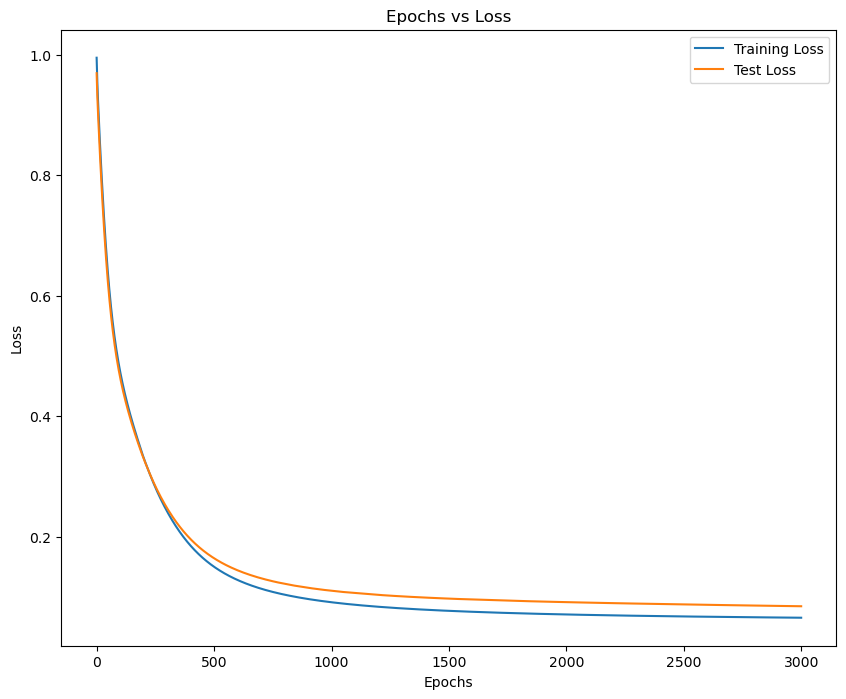

In [10]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();

In [11]:
#### Saving a PyTorch Model

from pathlib import Path 

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

# 3. Save the model state dict
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to models/model.pth


In [12]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
print(classification_report(y_true=y_test.cpu(), y_pred=y_preds.cpu()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

